In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [114]:
# Read and create data frame for Border Entries file
bd_ent = pd.read_csv('Border_Crossing_Entry_Data.csv')
bd_ent

,Port Name,State,Port Code,Border,Date,Measure,Value,Location
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524)
1,Van Buren,Maine,108,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207)
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333)
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996)
4,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005)
...,...,...,...,...,...,...,...,...
346728,Norton,Vermont,211,US-Canada Border,01/01/1996 12:00:00 AM,Personal Vehicle Passengers,9119,POINT (-71.79 45.01)
346729,Columbus,New Mexico,2406,US-Mexico Border,01/01/1996 12:00:00 AM,Personal Vehicles,29486,POINT (-107.63 31.78)
346730,Hansboro,North Dakota,3415,US-Canada Border,01/01/1996 12:00:00 AM,Rail Containers Full,0,POINT (-99.35 49)
346731,Calexico East,California,2507,US-Mexico Border,01/01/1996 12:00:00 AM,Buses,0,POINT (-115.39 32.67)


In [115]:
# Read and create data frame for Trade file
trade = pd.read_csv('COW_Trade_3.0/dyadic_trade_3.0.csv')
trade.head()

,ccode1,ccode2,year,importer1,importer2,flow1,flow2,source1,source2,bel_lux_alt_flow1,bel_lux_alt_flow2,china_alt_flow1,china_alt_flow2,version
0,2.0,20,1920,United States of America,Canada,611.86,735.48,1,1,-9.0,-9.0,-9.0,-9.0,2.01
1,2.0,20,1921,United States of America,Canada,335.44,442.99,1,1,-9.0,-9.0,-9.0,-9.0,2.01
2,2.0,20,1922,United States of America,Canada,364.02,502.84,1,1,-9.0,-9.0,-9.0,-9.0,2.01
3,2.0,20,1923,United States of America,Canada,416.00,598.14,1,1,-9.0,-9.0,-9.0,-9.0,2.01
4,2.0,20,1924,United States of America,Canada,399.14,496.32,1,1,-9.0,-9.0,-9.0,-9.0,2.01


In [116]:
# clean trade dataframe to only get data on us imports from canada
can_export = trade.loc[(trade['importer1'] == 'United States of America') & (trade['importer2'] == 'Canada')]
can_export.head()
#flow 1 is from importer 2 into importer 1

,ccode1,ccode2,year,importer1,importer2,flow1,flow2,source1,source2,bel_lux_alt_flow1,bel_lux_alt_flow2,china_alt_flow1,china_alt_flow2,version
0,2.0,20,1920,United States of America,Canada,611.86,735.48,1,1,-9.0,-9.0,-9.0,-9.0,2.01
1,2.0,20,1921,United States of America,Canada,335.44,442.99,1,1,-9.0,-9.0,-9.0,-9.0,2.01
2,2.0,20,1922,United States of America,Canada,364.02,502.84,1,1,-9.0,-9.0,-9.0,-9.0,2.01
3,2.0,20,1923,United States of America,Canada,416.00,598.14,1,1,-9.0,-9.0,-9.0,-9.0,2.01
4,2.0,20,1924,United States of America,Canada,399.14,496.32,1,1,-9.0,-9.0,-9.0,-9.0,2.01


In [117]:
# clean trade dataframe to only get data on us imoprts from mexico
mex_export = trade.loc[(trade['importer1'] == 'United States of America') & (trade['importer2'] == 'Mexico')]
mex_export.head()
#flow 1 is from importer 2 into importer 1

,ccode1,ccode2,year,importer1,importer2,flow1,flow2,source1,source2,bel_lux_alt_flow1,bel_lux_alt_flow2,china_alt_flow1,china_alt_flow2,version
790,2.0,70,1870,United States of America,Mexico,3.0,6.0,1,1,-9.0,-9.0,-9.0,-9.0,2.01
791,2.0,70,1871,United States of America,Mexico,3.0,8.0,1,1,-9.0,-9.0,-9.0,-9.0,2.01
792,2.0,70,1872,United States of America,Mexico,-9.0,-9.0,-9,-9,-9.0,-9.0,-9.0,-9.0,2.01
793,2.0,70,1873,United States of America,Mexico,4.0,6.0,1,1,-9.0,-9.0,-9.0,-9.0,2.01
794,2.0,70,1874,United States of America,Mexico,4.0,6.0,1,1,-9.0,-9.0,-9.0,-9.0,2.01


In [118]:
# append mexico export data frame to canada export data frame
complete_nafta_trade = can_export.append(mex_export)
complete_nafta_trade
#flow 1 is entering millions of dollars into US from 'importer 2'

,ccode1,ccode2,year,importer1,importer2,flow1,flow2,source1,source2,bel_lux_alt_flow1,bel_lux_alt_flow2,china_alt_flow1,china_alt_flow2,version
0,2.0,20,1920,United States of America,Canada,611.86,735.48,1,1,-9.0,-9.0,-9.0,-9.0,2.01
1,2.0,20,1921,United States of America,Canada,335.44,442.99,1,1,-9.0,-9.0,-9.0,-9.0,2.01
2,2.0,20,1922,United States of America,Canada,364.02,502.84,1,1,-9.0,-9.0,-9.0,-9.0,2.01
3,2.0,20,1923,United States of America,Canada,416.00,598.14,1,1,-9.0,-9.0,-9.0,-9.0,2.01
4,2.0,20,1924,United States of America,Canada,399.14,496.32,1,1,-9.0,-9.0,-9.0,-9.0,2.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,2.0,70,2005,United States of America,Mexico,172485.00,130402.00,2,2,-9.0,-9.0,-9.0,-9.0,2.01
926,2.0,70,2006,United States of America,Mexico,200515.00,143421.00,2,2,-9.0,-9.0,-9.0,-9.0,2.01
927,2.0,70,2007,United States of America,Mexico,212889.00,153420.00,2,2,-9.0,-9.0,-9.0,-9.0,3.00
928,2.0,70,2008,United States of America,Mexico,218086.00,166468.00,2,2,-9.0,-9.0,-9.0,-9.0,3.00


In [119]:
nafta_trade = complete_nafta_trade[['year', 'importer1', 'importer2', 'flow1']].copy()
nafta_trade

,year,importer1,importer2,flow1
0,1920,United States of America,Canada,611.86
1,1921,United States of America,Canada,335.44
2,1922,United States of America,Canada,364.02
3,1923,United States of America,Canada,416.00
4,1924,United States of America,Canada,399.14
...,...,...,...,...
925,2005,United States of America,Mexico,172485.00
926,2006,United States of America,Mexico,200515.00
927,2007,United States of America,Mexico,212889.00
928,2008,United States of America,Mexico,218086.00


In [120]:
nafta_trade.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 0 to 929
Data columns (total 4 columns):
year         230 non-null int64
importer1    230 non-null object
importer2    230 non-null object
flow1        230 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 9.0+ KB


In [121]:
bd_ent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346733 entries, 0 to 346732
Data columns (total 8 columns):
Port Name    346733 non-null object
State        346733 non-null object
Port Code    346733 non-null int64
Border       346733 non-null object
Date         346733 non-null object
Measure      346733 non-null object
Value        346733 non-null int64
Location     346733 non-null object
dtypes: int64(2), object(6)
memory usage: 21.2+ MB


In [122]:
bd_ent['Year'] = pd.to_datetime(bd_ent['Date'])

In [123]:
bd_ent.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Location,Year
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524),2019-03-01
1,Van Buren,Maine,108,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207),2019-03-01
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333),2019-03-01
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996),2019-03-01
4,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005),2019-03-01


In [124]:
bd_ent['Month'] = pd.to_datetime(bd_ent['Date'])
bd_ent

,Port Name,State,Port Code,Border,Date,Measure,Value,Location,Year,Month
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524),2019-03-01,2019-03-01
1,Van Buren,Maine,108,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207),2019-03-01,2019-03-01
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333),2019-03-01,2019-03-01
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996),2019-03-01,2019-03-01
4,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005),2019-03-01,2019-03-01
...,...,...,...,...,...,...,...,...,...,...
346728,Norton,Vermont,211,US-Canada Border,01/01/1996 12:00:00 AM,Personal Vehicle Passengers,9119,POINT (-71.79 45.01),1996-01-01,1996-01-01
346729,Columbus,New Mexico,2406,US-Mexico Border,01/01/1996 12:00:00 AM,Personal Vehicles,29486,POINT (-107.63 31.78),1996-01-01,1996-01-01
346730,Hansboro,North Dakota,3415,US-Canada Border,01/01/1996 12:00:00 AM,Rail Containers Full,0,POINT (-99.35 49),1996-01-01,1996-01-01
346731,Calexico East,California,2507,US-Mexico Border,01/01/1996 12:00:00 AM,Buses,0,POINT (-115.39 32.67),1996-01-01,1996-01-01


In [125]:
bd_ent['Year'] = bd_ent['Year'].dt.year
bd_ent.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Location,Year,Month
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524),2019,2019-03-01
1,Van Buren,Maine,108,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207),2019,2019-03-01
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333),2019,2019-03-01
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996),2019,2019-03-01
4,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005),2019,2019-03-01


In [126]:
bd_ent['Month'] = bd_ent['Month'].dt.month
bd_ent

,Port Name,State,Port Code,Border,Date,Measure,Value,Location,Year,Month
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524),2019,3
1,Van Buren,Maine,108,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207),2019,3
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333),2019,3
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996),2019,3
4,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005),2019,3
...,...,...,...,...,...,...,...,...,...,...
346728,Norton,Vermont,211,US-Canada Border,01/01/1996 12:00:00 AM,Personal Vehicle Passengers,9119,POINT (-71.79 45.01),1996,1
346729,Columbus,New Mexico,2406,US-Mexico Border,01/01/1996 12:00:00 AM,Personal Vehicles,29486,POINT (-107.63 31.78),1996,1
346730,Hansboro,North Dakota,3415,US-Canada Border,01/01/1996 12:00:00 AM,Rail Containers Full,0,POINT (-99.35 49),1996,1
346731,Calexico East,California,2507,US-Mexico Border,01/01/1996 12:00:00 AM,Buses,0,POINT (-115.39 32.67),1996,1


In [127]:
gb_year_df = bd_ent.groupby(bd_ent['Year'])

In [128]:
gb_year_df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Location,Year,Month
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524),2019,3
1,Van Buren,Maine,108,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207),2019,3
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333),2019,3
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996),2019,3
4,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005),2019,3
...,...,...,...,...,...,...,...,...,...,...
331901,Alexandria Bay,New York,708,US-Canada Border,12/01/1996 12:00:00 AM,Pedestrians,0,POINT (-75.98 44.35),1996,12
331902,Beecher Falls,Vermont,206,US-Canada Border,12/01/1996 12:00:00 AM,Truck Containers Empty,0,POINT (-71.51 45.01),1996,12
331903,Andrade,California,2502,US-Mexico Border,12/01/1996 12:00:00 AM,Rail Containers Full,0,POINT (-114.73000000000002 32.72),1996,12
331904,Whitlash,Montana,3321,US-Canada Border,12/01/1996 12:00:00 AM,Bus Passengers,0,POINT (-111.26000000000002 49),1996,12


In [129]:
len(gb_year_df)

24

In [130]:
gb_year_df.tail()

,Port Name,State,Port Code,Border,Date,Measure,Value,Location,Year,Month
2359,Fort Fairfield,Maine,107,US-Canada Border,01/01/2019 12:00:00 AM,Truck Containers Full,39,POINT (-67.82965 46.76891),2019,1
2360,Vanceboro,Maine,105,US-Canada Border,01/01/2019 12:00:00 AM,Train Passengers,54,POINT (-67.42955 45.55984),2019,1
2361,Roseau,Minnesota,3426,US-Canada Border,01/01/2019 12:00:00 AM,Personal Vehicles,2705,POINT (-95.81074 48.77518),2019,1
2362,El Paso,Texas,2402,US-Mexico Border,01/01/2019 12:00:00 AM,Pedestrians,582606,POINT (-106.48639 31.758610000000004),2019,1
2363,Sumas,Washington,3009,US-Canada Border,01/01/2019 12:00:00 AM,Buses,92,POINT (-122.26361 49.00028),2019,1
...,...,...,...,...,...,...,...,...,...,...
346728,Norton,Vermont,211,US-Canada Border,01/01/1996 12:00:00 AM,Personal Vehicle Passengers,9119,POINT (-71.79 45.01),1996,1
346729,Columbus,New Mexico,2406,US-Mexico Border,01/01/1996 12:00:00 AM,Personal Vehicles,29486,POINT (-107.63 31.78),1996,1
346730,Hansboro,North Dakota,3415,US-Canada Border,01/01/1996 12:00:00 AM,Rail Containers Full,0,POINT (-99.35 49),1996,1
346731,Calexico East,California,2507,US-Mexico Border,01/01/1996 12:00:00 AM,Buses,0,POINT (-115.39 32.67),1996,1


In [131]:
gb_year_df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Location,Year,Month
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524),2019,3
1,Van Buren,Maine,108,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207),2019,3
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333),2019,3
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996),2019,3
4,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005),2019,3
...,...,...,...,...,...,...,...,...,...,...
331901,Alexandria Bay,New York,708,US-Canada Border,12/01/1996 12:00:00 AM,Pedestrians,0,POINT (-75.98 44.35),1996,12
331902,Beecher Falls,Vermont,206,US-Canada Border,12/01/1996 12:00:00 AM,Truck Containers Empty,0,POINT (-71.51 45.01),1996,12
331903,Andrade,California,2502,US-Mexico Border,12/01/1996 12:00:00 AM,Rail Containers Full,0,POINT (-114.73000000000002 32.72),1996,12
331904,Whitlash,Montana,3321,US-Canada Border,12/01/1996 12:00:00 AM,Bus Passengers,0,POINT (-111.26000000000002 49),1996,12


In [132]:
measures = bd_ent.groupby(['Year','Border','Measure'])['Value'].sum()
measures.head()

Year  Border            Measure                    
1996  US-Canada Border  Bus Passengers                   3870081
                        Buses                             173279
                        Pedestrians                       607987
                        Personal Vehicle Passengers    101070734
                        Personal Vehicles               39531000
Name: Value, dtype: int64

In [133]:
measures
#each item in the measure column here will become a column in the nafta_trade df, with the values shown below inserted
# into each row for the given 

Year  Border            Measure                    
1996  US-Canada Border  Bus Passengers                   3870081
                        Buses                             173279
                        Pedestrians                       607987
                        Personal Vehicle Passengers    101070734
                        Personal Vehicles               39531000
                                                         ...    
2019  US-Mexico Border  Train Passengers                    2521
                        Trains                              2916
                        Truck Containers Empty            453762
                        Truck Containers Full            1185656
                        Trucks                           1619982
Name: Value, Length: 576, dtype: int64

In [134]:
measures = measures.reset_index()

In [135]:
measures.head()

,Year,Border,Measure,Value
0,1996,US-Canada Border,Bus Passengers,3870081
1,1996,US-Canada Border,Buses,173279
2,1996,US-Canada Border,Pedestrians,607987
3,1996,US-Canada Border,Personal Vehicle Passengers,101070734
4,1996,US-Canada Border,Personal Vehicles,39531000


In [136]:
per_border_vals = measures.groupby('Border')
per_border_vals.head()

,Year,Border,Measure,Value
0,1996,US-Canada Border,Bus Passengers,3870081
1,1996,US-Canada Border,Buses,173279
2,1996,US-Canada Border,Pedestrians,607987
3,1996,US-Canada Border,Personal Vehicle Passengers,101070734
4,1996,US-Canada Border,Personal Vehicles,39531000
12,1996,US-Mexico Border,Bus Passengers,1943697
13,1996,US-Mexico Border,Buses,119510
14,1996,US-Mexico Border,Pedestrians,34109364
15,1996,US-Mexico Border,Personal Vehicle Passengers,171522486
16,1996,US-Mexico Border,Personal Vehicles,62429373


In [137]:
total_measures = bd_ent.groupby(['Year', 'Measure'])['Value'].sum()
total_measures

Year  Measure                    
1996  Bus Passengers                   5813778
      Buses                             292789
      Pedestrians                     34717351
      Personal Vehicle Passengers    272593220
      Personal Vehicles              101960373
                                       ...    
2019  Train Passengers                   38014
      Trains                              8501
      Truck Containers Empty            825680
      Truck Containers Full            2230413
      Trucks                           3005611
Name: Value, Length: 288, dtype: int64

In [138]:
total_measures.reset_index()

,Year,Measure,Value
0,1996,Bus Passengers,5813778
1,1996,Buses,292789
2,1996,Pedestrians,34717351
3,1996,Personal Vehicle Passengers,272593220
4,1996,Personal Vehicles,101960373
...,...,...,...
283,2019,Train Passengers,38014
284,2019,Trains,8501
285,2019,Truck Containers Empty,825680
286,2019,Truck Containers Full,2230413


In [139]:
total_measures = total_measures.reset_index()

In [140]:
pivoted_totals = total_measures.pivot(index = 'Year', columns = 'Measure', values = 'Value')
pivoted_totals.head()

Measure,Bus Passengers,Buses,Pedestrians,Personal Vehicle Passengers,Personal Vehicles,Rail Containers Empty,Rail Containers Full,Train Passengers,Trains,Truck Containers Empty,Truck Containers Full,Trucks
Year,,,,,,,,,,,,
1996,5813778,292789,34717351,272593220,101960373,268134,472219,224881,38966,1599429,3124031,8685180
1997,6896919,389969,44461186,307001980,119003203,354288,620145,260610,40541,1920118,3708600,9516639
1998,7608484,436803,45060023,314295857,120451297,513721,1079074,258624,41116,2405012,6223216,10217477
1999,7725590,469496,48801064,330891505,126689655,611927,1376950,265341,38949,2768834,7641245,11176168
2000,8338859,460056,47677158,329841500,129202573,684988,1481674,287756,40555,2747769,7684947,11573707


In [141]:
measures.head()

,Year,Border,Measure,Value
0,1996,US-Canada Border,Bus Passengers,3870081
1,1996,US-Canada Border,Buses,173279
2,1996,US-Canada Border,Pedestrians,607987
3,1996,US-Canada Border,Personal Vehicle Passengers,101070734
4,1996,US-Canada Border,Personal Vehicles,39531000


In [142]:
can_measures = measures.loc[(measures['Border'] == 'US-Canada Border')]
can_measures.tail()

,Year,Border,Measure,Value
559,2019,US-Canada Border,Train Passengers,35493
560,2019,US-Canada Border,Trains,5585
561,2019,US-Canada Border,Truck Containers Empty,371918
562,2019,US-Canada Border,Truck Containers Full,1044757
563,2019,US-Canada Border,Trucks,1385629


In [143]:
mex_measures = measures.loc[(measures['Border'] == 'US-Mexico Border')]
mex_measures.tail()

,Year,Border,Measure,Value
571,2019,US-Mexico Border,Train Passengers,2521
572,2019,US-Mexico Border,Trains,2916
573,2019,US-Mexico Border,Truck Containers Empty,453762
574,2019,US-Mexico Border,Truck Containers Full,1185656
575,2019,US-Mexico Border,Trucks,1619982


In [144]:
len(mex_measures)

288

In [145]:
can_measures = can_measures.reset_index()
can_measures.tail()

,index,Year,Border,Measure,Value
283,559,2019,US-Canada Border,Train Passengers,35493
284,560,2019,US-Canada Border,Trains,5585
285,561,2019,US-Canada Border,Truck Containers Empty,371918
286,562,2019,US-Canada Border,Truck Containers Full,1044757
287,563,2019,US-Canada Border,Trucks,1385629


In [146]:
mex_measures = mex_measures.reset_index()
mex_measures.tail()

,index,Year,Border,Measure,Value
283,571,2019,US-Mexico Border,Train Passengers,2521
284,572,2019,US-Mexico Border,Trains,2916
285,573,2019,US-Mexico Border,Truck Containers Empty,453762
286,574,2019,US-Mexico Border,Truck Containers Full,1185656
287,575,2019,US-Mexico Border,Trucks,1619982


In [147]:
mex_measures = mex_measures.drop(columns=['index', 'Border'])
mex_measures.head()

,Year,Measure,Value
0,1996,Bus Passengers,1943697
1,1996,Buses,119510
2,1996,Pedestrians,34109364
3,1996,Personal Vehicle Passengers,171522486
4,1996,Personal Vehicles,62429373


In [148]:
can_measures = can_measures.drop(columns=['index','Border'])
can_measures.head()

,Year,Measure,Value
0,1996,Bus Passengers,3870081
1,1996,Buses,173279
2,1996,Pedestrians,607987
3,1996,Personal Vehicle Passengers,101070734
4,1996,Personal Vehicles,39531000


In [149]:
pivot_can = can_measures.pivot(index = 'Year', columns = 'Measure', values='Value')

In [150]:
pivot_mex = mex_measures.pivot(index='Year', columns = 'Measure', values = 'Value')

In [151]:
pivot_mex.head()

Measure,Bus Passengers,Buses,Pedestrians,Personal Vehicle Passengers,Personal Vehicles,Rail Containers Empty,Rail Containers Full,Train Passengers,Trains,Truck Containers Empty,Truck Containers Full,Trucks
Year,,,,,,,,,,,,
1996,1943697,119510,34109364,171522486,62429373,144127,142236,11285,7509,1364375,1703402,3254084
1997,2772666,225749,43911311,214354991,80052978,173873,156064,11504,7678,1562595,1742414,3689665
1998,3638812,263340,44461554,226012670,83854491,212416,175490,12691,5681,1721558,1991368,3946543
1999,3358118,287819,48213234,241522310,89469745,274360,226014,16169,6019,1917071,2309816,4358721
2000,3465916,270792,47089642,239794552,92287520,305590,266235,18254,7108,1850581,2350100,4525579


In [152]:
pivot_can.tail()

Measure,Bus Passengers,Buses,Pedestrians,Personal Vehicle Passengers,Personal Vehicles,Rail Containers Empty,Rail Containers Full,Train Passengers,Trains,Truck Containers Empty,Truck Containers Full,Trucks
Year,,,,,,,,,,,,
2015,2039220,95833,444523,52122219,28544860,726818,1610670,286090,30969,1283452,4580887,5791021
2016,1939294,88234,461520,49812247,27319904,634506,1565927,287188,29486,1175217,4760317,5877938
2017,1864662,84182,442766,50145103,26759167,772283,1715989,284200,22475,1783210,4547644,5846593
2018,1795768,77864,486290,51460865,26904776,755431,1840464,289317,23730,1638277,4310625,5830926
2019,239178,12092,44921,9471529,5173856,167323,439447,35493,5585,371918,1044757,1385629


In [153]:
nafta_trade

,year,importer1,importer2,flow1
0,1920,United States of America,Canada,611.86
1,1921,United States of America,Canada,335.44
2,1922,United States of America,Canada,364.02
3,1923,United States of America,Canada,416.00
4,1924,United States of America,Canada,399.14
...,...,...,...,...
925,2005,United States of America,Mexico,172485.00
926,2006,United States of America,Mexico,200515.00
927,2007,United States of America,Mexico,212889.00
928,2008,United States of America,Mexico,218086.00


In [154]:
#nafta_can_trim = nafta_trade.drop(index = np.arange(0,76))
#nafta_can_trim = nafta_trade.drop(index = np.arange(24,90))

In [155]:
nafta_trade = nafta_trade.reset_index()
nafta_trade.head()

,index,year,importer1,importer2,flow1
0,0,1920,United States of America,Canada,611.86
1,1,1921,United States of America,Canada,335.44
2,2,1922,United States of America,Canada,364.02
3,3,1923,United States of America,Canada,416.00
4,4,1924,United States of America,Canada,399.14


In [156]:
nafta_trade = nafta_trade.drop(columns='index')
nafta_trade.head()

,year,importer1,importer2,flow1
0,1920,United States of America,Canada,611.86
1,1921,United States of America,Canada,335.44
2,1922,United States of America,Canada,364.02
3,1923,United States of America,Canada,416.00
4,1924,United States of America,Canada,399.14


In [157]:
nafta_can_trim = nafta_trade.drop(index = np.arange(0,76))
nafta_can_trim.head()

,year,importer1,importer2,flow1
76,1996,United States of America,Canada,159746.0
77,1997,United States of America,Canada,171440.0
78,1998,United States of America,Canada,178048.0
79,1999,United States of America,Canada,198829.0
80,2000,United States of America,Canada,229191.0


In [158]:
nafta_can_trim.head(25)

,year,importer1,importer2,flow1
76,1996,United States of America,Canada,159746.0
77,1997,United States of America,Canada,171440.0
78,1998,United States of America,Canada,178048.0
79,1999,United States of America,Canada,198829.0
80,2000,United States of America,Canada,229191.0
81,2001,United States of America,Canada,220138.0
82,2002,United States of America,Canada,213954.0
83,2003,United States of America,Canada,227652.0
84,2004,United States of America,Canada,259807.0
85,2005,United States of America,Canada,291944.0


In [159]:
nafta_can_trim.tail()

,year,importer1,importer2,flow1
225,2005,United States of America,Mexico,172485.0
226,2006,United States of America,Mexico,200515.0
227,2007,United States of America,Mexico,212889.0
228,2008,United States of America,Mexico,218086.0
229,2009,United States of America,Mexico,178335.0


In [160]:
nafta_can_trim = nafta_can_trim.drop(index = np.arange(90,229))
nafta_can_trim

,year,importer1,importer2,flow1
76,1996,United States of America,Canada,159746.0
77,1997,United States of America,Canada,171440.0
78,1998,United States of America,Canada,178048.0
79,1999,United States of America,Canada,198829.0
80,2000,United States of America,Canada,229191.0
81,2001,United States of America,Canada,220138.0
82,2002,United States of America,Canada,213954.0
83,2003,United States of America,Canada,227652.0
84,2004,United States of America,Canada,259807.0
85,2005,United States of America,Canada,291944.0


In [161]:
nafta_can_trim = nafta_can_trim.drop(index = 229)
nafta_can_trim

,year,importer1,importer2,flow1
76,1996,United States of America,Canada,159746.0
77,1997,United States of America,Canada,171440.0
78,1998,United States of America,Canada,178048.0
79,1999,United States of America,Canada,198829.0
80,2000,United States of America,Canada,229191.0
81,2001,United States of America,Canada,220138.0
82,2002,United States of America,Canada,213954.0
83,2003,United States of America,Canada,227652.0
84,2004,United States of America,Canada,259807.0
85,2005,United States of America,Canada,291944.0


In [162]:
nafta_mex_trim = nafta_trade.drop(index = np.arange(0,216))
nafta_mex_trim

,year,importer1,importer2,flow1
216,1996,United States of America,Mexico,74111.1
217,1997,United States of America,Mexico,87167.2
218,1998,United States of America,Mexico,96077.8
219,1999,United States of America,Mexico,109499.0
220,2000,United States of America,Mexico,135080.0
221,2001,United States of America,Mexico,132778.0
222,2002,United States of America,Mexico,136144.0
223,2003,United States of America,Mexico,139702.0
224,2004,United States of America,Mexico,157821.0
225,2005,United States of America,Mexico,172485.0


In [163]:
pivot_mex

Measure,Bus Passengers,Buses,Pedestrians,Personal Vehicle Passengers,Personal Vehicles,Rail Containers Empty,Rail Containers Full,Train Passengers,Trains,Truck Containers Empty,Truck Containers Full,Trucks
Year,,,,,,,,,,,,
1996,1943697,119510,34109364,171522486,62429373,144127,142236,11285,7509,1364375,1703402,3254084
1997,2772666,225749,43911311,214354991,80052978,173873,156064,11504,7678,1562595,1742414,3689665
1998,3638812,263340,44461554,226012670,83854491,212416,175490,12691,5681,1721558,1991368,3946543
1999,3358118,287819,48213234,241522310,89469745,274360,226014,16169,6019,1917071,2309816,4358721
2000,3465916,270792,47089642,239794552,92287520,305590,266235,18254,7108,1850581,2350100,4525579
2001,3366795,288285,51501321,209105846,89526957,316080,266572,18895,7469,1916207,2372125,4304959
2002,3926154,309360,50278281,199020692,89849415,332772,269550,15108,7757,1911367,2523074,4426593
2003,3746885,319087,48663773,193697482,88068391,341006,266469,12101,7774,1693207,2600019,4238045
2004,3388517,269027,48084235,190936607,91133889,369557,305748,12664,7844,1664660,2848240,4503688


In [164]:
nafta_mex_trim = nafta_mex_trim.set_index('year')
nafta_mex_trim

,importer1,importer2,flow1
year,,,
1996,United States of America,Mexico,74111.1
1997,United States of America,Mexico,87167.2
1998,United States of America,Mexico,96077.8
1999,United States of America,Mexico,109499.0
2000,United States of America,Mexico,135080.0
2001,United States of America,Mexico,132778.0
2002,United States of America,Mexico,136144.0
2003,United States of America,Mexico,139702.0
2004,United States of America,Mexico,157821.0


In [165]:
mexican_trade = pivot_mex.merge(nafta_mex_trim, left_index = True, right_on = 'year')
mexican_trade

,Bus Passengers,Buses,Pedestrians,Personal Vehicle Passengers,Personal Vehicles,Rail Containers Empty,Rail Containers Full,Train Passengers,Trains,Truck Containers Empty,Truck Containers Full,Trucks,importer1,importer2,flow1
year,,,,,,,,,,,,,,,
1996,1943697,119510,34109364,171522486,62429373,144127,142236,11285,7509,1364375,1703402,3254084,United States of America,Mexico,74111.1
1997,2772666,225749,43911311,214354991,80052978,173873,156064,11504,7678,1562595,1742414,3689665,United States of America,Mexico,87167.2
1998,3638812,263340,44461554,226012670,83854491,212416,175490,12691,5681,1721558,1991368,3946543,United States of America,Mexico,96077.8
1999,3358118,287819,48213234,241522310,89469745,274360,226014,16169,6019,1917071,2309816,4358721,United States of America,Mexico,109499.0
2000,3465916,270792,47089642,239794552,92287520,305590,266235,18254,7108,1850581,2350100,4525579,United States of America,Mexico,135080.0
2001,3366795,288285,51501321,209105846,89526957,316080,266572,18895,7469,1916207,2372125,4304959,United States of America,Mexico,132778.0
2002,3926154,309360,50278281,199020692,89849415,332772,269550,15108,7757,1911367,2523074,4426593,United States of America,Mexico,136144.0
2003,3746885,319087,48663773,193697482,88068391,341006,266469,12101,7774,1693207,2600019,4238045,United States of America,Mexico,139702.0
2004,3388517,269027,48084235,190936607,91133889,369557,305748,12664,7844,1664660,2848240,4503688,United States of America,Mexico,157821.0


In [166]:
nafta_can_trim = nafta_can_trim.set_index('year')
canadian_trade = pivot_mex.merge(nafta_can_trim, left_index = True, right_on = 'year')

In [167]:
canadian_trade

,Bus Passengers,Buses,Pedestrians,Personal Vehicle Passengers,Personal Vehicles,Rail Containers Empty,Rail Containers Full,Train Passengers,Trains,Truck Containers Empty,Truck Containers Full,Trucks,importer1,importer2,flow1
year,,,,,,,,,,,,,,,
1996,1943697,119510,34109364,171522486,62429373,144127,142236,11285,7509,1364375,1703402,3254084,United States of America,Canada,159746.0
1997,2772666,225749,43911311,214354991,80052978,173873,156064,11504,7678,1562595,1742414,3689665,United States of America,Canada,171440.0
1998,3638812,263340,44461554,226012670,83854491,212416,175490,12691,5681,1721558,1991368,3946543,United States of America,Canada,178048.0
1999,3358118,287819,48213234,241522310,89469745,274360,226014,16169,6019,1917071,2309816,4358721,United States of America,Canada,198829.0
2000,3465916,270792,47089642,239794552,92287520,305590,266235,18254,7108,1850581,2350100,4525579,United States of America,Canada,229191.0
2001,3366795,288285,51501321,209105846,89526957,316080,266572,18895,7469,1916207,2372125,4304959,United States of America,Canada,220138.0
2002,3926154,309360,50278281,199020692,89849415,332772,269550,15108,7757,1911367,2523074,4426593,United States of America,Canada,213954.0
2003,3746885,319087,48663773,193697482,88068391,341006,266469,12101,7774,1693207,2600019,4238045,United States of America,Canada,227652.0
2004,3388517,269027,48084235,190936607,91133889,369557,305748,12664,7844,1664660,2848240,4503688,United States of America,Canada,259807.0


In [168]:
all_trade = mexican_trade.append(canadian_trade)

In [169]:
all_trade = all_trade.drop(columns = 'importer1')

In [170]:
all_trade

,Bus Passengers,Buses,Pedestrians,Personal Vehicle Passengers,Personal Vehicles,Rail Containers Empty,Rail Containers Full,Train Passengers,Trains,Truck Containers Empty,Truck Containers Full,Trucks,importer2,flow1
year,,,,,,,,,,,,,,
1996,1943697,119510,34109364,171522486,62429373,144127,142236,11285,7509,1364375,1703402,3254084,Mexico,74111.1
1997,2772666,225749,43911311,214354991,80052978,173873,156064,11504,7678,1562595,1742414,3689665,Mexico,87167.2
1998,3638812,263340,44461554,226012670,83854491,212416,175490,12691,5681,1721558,1991368,3946543,Mexico,96077.8
1999,3358118,287819,48213234,241522310,89469745,274360,226014,16169,6019,1917071,2309816,4358721,Mexico,109499.0
2000,3465916,270792,47089642,239794552,92287520,305590,266235,18254,7108,1850581,2350100,4525579,Mexico,135080.0
2001,3366795,288285,51501321,209105846,89526957,316080,266572,18895,7469,1916207,2372125,4304959,Mexico,132778.0
2002,3926154,309360,50278281,199020692,89849415,332772,269550,15108,7757,1911367,2523074,4426593,Mexico,136144.0
2003,3746885,319087,48663773,193697482,88068391,341006,266469,12101,7774,1693207,2600019,4238045,Mexico,139702.0
2004,3388517,269027,48084235,190936607,91133889,369557,305748,12664,7844,1664660,2848240,4503688,Mexico,157821.0


# Mexico Border Analysis by State

In [171]:
# Analyze the trends ovbserved by state over time
bd_ent.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Location,Year,Month
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524),2019,3
1,Van Buren,Maine,108,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207),2019,3
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333),2019,3
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996),2019,3
4,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005),2019,3


In [172]:
# Access all rows with data related to the US-Mexico Border
mex_bd = bd_ent.loc[bd_ent['Border'] == 'US-Mexico Border'] 
mex_bd

,Port Name,State,Port Code,Border,Date,Measure,Value,Location,Year,Month
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524),2019,3
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333),2019,3
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996),2019,3
7,Progreso,Texas,2309,US-Mexico Border,03/01/2019 12:00:00 AM,Truck Containers Empty,1808,POINT (-97.94889 26.061670000000003),2019,3
19,San Ysidro,California,2504,US-Mexico Border,03/01/2019 12:00:00 AM,Bus Passengers,7779,POINT (-117.02666999999998 32.54306),2019,3
...,...,...,...,...,...,...,...,...,...,...
346716,Naco,Arizona,2603,US-Mexico Border,01/01/1996 12:00:00 AM,Rail Containers Empty,0,POINT (-109.95 31.33),1996,1
346724,Otay Mesa,California,2506,US-Mexico Border,01/01/1996 12:00:00 AM,Truck Containers Empty,20862,POINT (-116.94 32.55),1996,1
346729,Columbus,New Mexico,2406,US-Mexico Border,01/01/1996 12:00:00 AM,Personal Vehicles,29486,POINT (-107.63 31.78),1996,1
346731,Calexico East,California,2507,US-Mexico Border,01/01/1996 12:00:00 AM,Buses,0,POINT (-115.39 32.67),1996,1


In [173]:
# Make new data frame with columns that I am only interested in
mex_bd_state = mex_bd[['Year', 'State', 'Measure', 'Value']]
mex_bd_state.head()

,Year,State,Measure,Value
0,2019,California,Trucks,34447
2,2019,California,Trucks,81217
3,2019,Arizona,Trains,62
7,2019,Texas,Truck Containers Empty,1808
19,2019,California,Bus Passengers,7779


In [227]:
# Just observing the unique types of enterance to the border
mex_bd_state['Measure'].unique()

array(['Bus Passengers', 'Buses', 'Pedestrians',
       'Personal Vehicle Passengers', 'Personal Vehicles',
       'Rail Containers Empty', 'Rail Containers Full',
       'Train Passengers', 'Trains', 'Truck Containers Empty',
       'Truck Containers Full', 'Trucks'], dtype=object)

In [228]:
# Group my mexican border data from by Year, State, Measure, and sum counts of each measure
mex_bd_state = mex_bd_state.groupby(['Year','State','Measure'])['Value'].sum()
mex_bd_state

Year  State    Measure                    
1996  Arizona  Bus Passengers                    30778
               Buses                              4108
               Pedestrians                     7491274
               Personal Vehicle Passengers    21474592
               Personal Vehicles               8407128
                                                ...   
2019  Texas    Train Passengers                   1634
               Trains                             2554
               Truck Containers Empty           313800
               Truck Containers Full            817344
               Trucks                          1127189
Name: Value, Length: 1140, dtype: int64

In [229]:
# Reset my index
mex_bd_state = mex_bd_state.reset_index()
mex_bd_state

,Year,State,Measure,Value
0,1996,Arizona,Bus Passengers,30778
1,1996,Arizona,Buses,4108
2,1996,Arizona,Pedestrians,7491274
3,1996,Arizona,Personal Vehicle Passengers,21474592
4,1996,Arizona,Personal Vehicles,8407128
...,...,...,...,...
1135,2019,Texas,Train Passengers,1634
1136,2019,Texas,Trains,2554
1137,2019,Texas,Truck Containers Empty,313800
1138,2019,Texas,Truck Containers Full,817344


In [230]:
# pivot my data frame so that I can analyze my the total number of migrants coming into the US from Mexico by state over time
pvt_mex_bd_state = pd.pivot_table(mex_bd_state, values=['Value'], index='Year',
                 columns=['State', 'Measure'])
pvt_mex_bd_state

Value                                                   \
State          Arizona                                                    
Measure Bus Passengers    Buses Pedestrians Personal Vehicle Passengers   
Year                                                                      
1996           30778.0   4108.0   7491274.0                  21474592.0   
1997           33528.0   4572.0   7614629.0                  23182567.0   
1998           58055.0   5592.0   7601268.0                  23974390.0   
1999          100838.0  10018.0   8379549.0                  25221458.0   
2000          167035.0  14409.0   8390803.0                  26856458.0   
2001          174718.0  13344.0   8994847.0                  23726701.0   
2002          177830.0  13211.0   9682233.0                  26895469.0   
2003          209897.0  13407.0   9154958.0                  24424403.0   
2004          209100.0  12652.0   9186005.0                  25114067.0   
2005          242861.0  13461.0  10074501.0                  22539153.0   
2006          378829.0  18536.0  11328799.0                  20382103.0   
2007          309531.0  16913.0  11806206.0                  19593375.0   
2008          259714.0  15658.0  10517482.0                  18427240.0   
2009          194159.0  14035.0   8066921.0                  17579271.0   
2010          185071.0  12624.0   7648107.0                  14726256.0   
2011          178395.0  11586.0   7440332.0                  12879043.0   
2012          182114.0  10557.0   7048474.0                  14015636.0   
2013          182845.0  11294.0   7154131.0                  15462699.0   
2014          185376.0  12236.0   6310951.0                  16367308.0   
2015          195585.0  13088.0   6677176.0                  16918258.0   
2016          219887.0  13490.0   6980368.0                  16870301.0   
2017          220985.0  16163.0   7005728.0                  18146485.0   
2018          223884.0  12793.0   7110476.0                  17781150.0   
2019           54076.0   2662.0   1714160.0                   4069573.0   

                                                                      \
State                                                                  
Measure Personal Vehicles Rail Containers Empty Rail Containers Full   
Year                                                                   
1996            8407128.0               11922.0              13430.0   
1997            9023069.0               12944.0              15539.0   
1998            9098298.0               15284.0              20528.0   
1999            9887368.0               14226.0              19466.0   
2000           10304130.0               25353.0              25249.0   
2001           10102009.0               22951.0              35716.0   
2002           10428347.0               20447.0              31789.0   
2003            9913062.0               21083.0              24602.0   
2004           10195882.0               19460.0              27439.0   
2005            9779607.0               18083.0              28748.0   
2006            8746845.0               17994.0              41821.0   
2007            8208024.0               18309.0              34060.0   
2008            7735264.0               23582.0              31975.0   
2009            7387953.0               18097.0              26735.0   
2010            6650691.0               18141.0              35862.0   
2011            6713284.0               22471.0              38761.0   
2012            7472683.0               23464.0              37931.0   
2013            8172192.0               33885.0              49481.0   
2014            8518851.0               32963.0              42802.0   
2015            8829393.0               34537.0              44778.0   
2016            8845350.0               31212.0              40042.0   
2017            9487133.0               30819.0              32014.0   
2018            9334650.0               4052

In [232]:
# Find the total number of pedestrians coming into each state on the Mexican Border
ped_table = pvt_mex_bd_state[pvt_mex_bd_state.columns[[2,14,26,38]]]
ped_table
# These numbers are massive

Value                                    
State       Arizona  California  New Mexico       Texas
Measure Pedestrians Pedestrians Pedestrians Pedestrians
Year                                                   
1996      7491274.0   9548097.0    144652.0  16925341.0
1997      7614629.0  17536073.0    120575.0  18640034.0
1998      7601268.0  17757504.0    142050.0  18960732.0
1999      8379549.0  18278225.0    199644.0  21355816.0
2000      8390803.0  18596679.0    191351.0  19910809.0
2001      8994847.0  21699797.0    185814.0  20620863.0
2002      9682233.0  18628200.0    264165.0  21703683.0
2003      9154958.0  18193283.0    259312.0  21056220.0
2004      9186005.0  18197094.0    260807.0  20440329.0
2005     10074501.0  16462335.0    275527.0  19017249.0
2006     11328799.0  15517700.0    251118.0  19153797.0
2007     11806206.0  16553220.0    264851.0  20914686.0
2008     10517482.0  15064432.0    226493.0  19033233.0
2009      8066921.0  14124387.0    276090.0  18847287.0
2010      7648107.0  14740276.0    370988.0  17155610.0
2011      7440332.0  16859463.0    357675.0  15363746.0
2012      7048474.0  18140671.0    368717.0  15583778.0
2013      7154131.0  17729194.0    445498.0  15870112.0
2014      6310951.0  17762847.0    442904.0  16706590.0
2015      6677176.0  16615428.0    464512.0  17422851.0
2016      6980368.0  16918967.0    437452.0  17832441.0
2017      7005728.0  17999687.0    392456.0  17200200.0
2018      7110476.0  20160358.0    423835.0  18479212.0
2019      1714160.0   5292505.0     93730.0   4438905.0

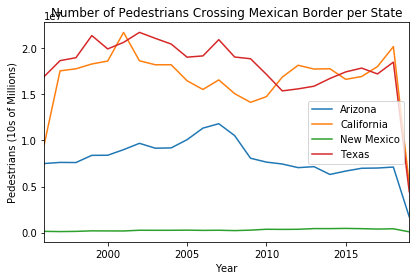

In [295]:
# Plot my findings

ped_table.plot(kind='line',)
plt.legend(['Arizona','California','New Mexico','Texas'])
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.ylabel('Pedestrians (10s of Millions)')
plt.title('Number of Pedestrians Crossing Mexican Border per State')

plt.tight_layout()
# I should drop 2019 from my graph since data is only collected until 2019

# Canada Border Analysis by State

In [181]:
can_bd = bd_ent.loc[bd_ent['Border'] == 'US-Canada Border'] 
can_bd

,Port Name,State,Port Code,Border,Date,Measure,Value,Location,Year,Month
1,Van Buren,Maine,108,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207),2019,3
4,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005),2019,3
5,Madawaska,Maine,109,US-Canada Border,03/01/2019 12:00:00 AM,Trucks,179,POINT (-68.3271 47.35446),2019,3
6,Pembina,North Dakota,3401,US-Canada Border,03/01/2019 12:00:00 AM,Bus Passengers,1054,POINT (-97.24333 48.96639),2019,3
8,Portal,North Dakota,3403,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Empty,6685,POINT (-102.54917 48.99583),2019,3
...,...,...,...,...,...,...,...,...,...,...
346725,Northgate,North Dakota,3406,US-Canada Border,01/01/1996 12:00:00 AM,Trucks,1107,POINT (-102.27 49),1996,1
346726,Turner,Montana,3306,US-Canada Border,01/01/1996 12:00:00 AM,Rail Containers Empty,0,POINT (-108.39 49),1996,1
346727,Fort Kent,Maine,110,US-Canada Border,01/01/1996 12:00:00 AM,Trucks,1333,POINT (-68.6 47.25),1996,1
346728,Norton,Vermont,211,US-Canada Border,01/01/1996 12:00:00 AM,Personal Vehicle Passengers,9119,POINT (-71.79 45.01),1996,1


In [182]:
can_bd_state = can_bd[['Year', 'State', 'Measure', 'Value']]
can_bd_state.head()

,Year,State,Measure,Value
1,2019,Maine,Rail Containers Full,428
4,2019,New York,Personal Vehicle Passengers,16377
5,2019,Maine,Trucks,179
6,2019,North Dakota,Bus Passengers,1054
8,2019,North Dakota,Rail Containers Empty,6685


In [287]:
can_bd_state['Measure'].unique()

array(['Bus Passengers', 'Buses', 'Pedestrians',
       'Personal Vehicle Passengers', 'Personal Vehicles',
       'Rail Containers Empty', 'Rail Containers Full',
       'Train Passengers', 'Trains', 'Truck Containers Empty',
       'Truck Containers Full', 'Trucks'], dtype=object)

In [183]:
can_bd_state = can_bd_state.groupby(['Year','State','Measure'])['Value'].sum()
can_bd_state

Year  State       Measure                    
1996  Alaska      Bus Passengers                 106758
                  Buses                            7867
                  Pedestrians                       781
                  Personal Vehicle Passengers    259251
                  Personal Vehicles              116554
                                                  ...  
2019  Washington  Train Passengers                16385
                  Trains                            629
                  Truck Containers Empty          48952
                  Truck Containers Full          109614
                  Trucks                         153315
Name: Value, Length: 2870, dtype: int64

In [199]:
can_bd_state = can_bd_state.reset_index()

In [200]:
can_bd_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2870 entries, 0 to 2869
Data columns (total 4 columns):
Year       2870 non-null int64
State      2870 non-null object
Measure    2870 non-null object
Value      2870 non-null int64
dtypes: int64(2), object(2)
memory usage: 89.8+ KB


In [201]:
pvt_can_bd_state = pd.pivot_table(can_bd_state, values=['Value'], index='Year',
                                  columns=['State', 'Measure'])
pvt_can_bd_state

Value                                                   \
State           Alaska                                                    
Measure Bus Passengers    Buses Pedestrians Personal Vehicle Passengers   
Year                                                                      
1996          106758.0   7867.0       781.0                    259251.0   
1997          133063.0   9115.0       652.0                    256530.0   
1998          149938.0   9666.0       576.0                    303421.0   
1999          156234.0  10134.0       432.0                    260303.0   
2000          149128.0   9603.0       216.0                    264428.0   
2001          138933.0   9044.0       318.0                    251583.0   
2002          141450.0   9391.0       247.0                    256106.0   
2003          147567.0  10080.0       346.0                    241965.0   
2004          145868.0  10200.0      4066.0                    253701.0   
2005          147633.0  11077.0      3989.0                    238445.0   
2006          156849.0  11177.0      3527.0                    211605.0   
2007          170600.0  12202.0       932.0                    207882.0   
2008          167144.0  11915.0       713.0                    190112.0   
2009          170065.0  11015.0      2836.0                    205504.0   
2010          157102.0  10830.0      2745.0                    207433.0   
2011          158466.0  11102.0      2781.0                    213009.0   
2012          168851.0  12197.0      2486.0                    229786.0   
2013          164685.0  12543.0      2640.0                    229863.0   
2014          189989.0  13002.0      2066.0                    214766.0   
2015          167107.0  11398.0      5428.0                    238622.0   
2016          182062.0  12003.0      3502.0                    261082.0   
2017          188239.0  12220.0      2112.0                    260404.0   
2018          210359.0  11893.0      2566.0                    285309.0   
2019               NaN      NaN        72.0                     15892.0   

                                                                      \
State                                                                  
Measure Personal Vehicles Rail Containers Empty Rail Containers Full   
Year                                                                   
1996             116554.0                   0.0                  0.0   
1997             114562.0                   0.0                  0.0   
1998             124396.0                   0.0                  0.0   
1999             119662.0                   0.0                  0.0   
2000             117925.0                   0.0                  0.0   
2001             115559.0                   0.0                  0.0   
2002             112494.0                   0.0                  0.0   
2003             114387.0                   0.0                  0.0   
2004             117142.0                   0.0                  0.0   
2005             111563.0                   0.0                  0.0   
2006              99334.0                   0.0                  0.0   
2007             106534.0                   0.0                  0.0   
2008              91950.0                   0.0                  0.0   
2009              97832.0                   0.0                  0.0   
2010              97879.0                   0.0                  0.0   
2011              92911.0                   0.0                  0.0   
2012              91014.0                   0.0                  0.0   
2013              90780.0                   0.0                  0.0   
2014              89997.0                   0.0                  0.0   
2015             108430.0                   0.0                  0.0   
2016             122011.0                   0.0                  0.0   
2017             120361.0                   NaN                  NaN   
2018             124401.0                   

In [222]:
can_bd.State.unique()

array(['Maine', 'New York', 'North Dakota', 'Montana', 'Minnesota',
       'Vermont', 'Washington', 'Idaho', 'Michigan', 'Alaska', 'Ohio'],
      dtype=object)

In [272]:
can_ped_table = pvt_can_bd_state[pvt_can_bd_state.columns[[2,14,26,38,50,62,74,86,98,110]]]
can_ped_table

Value                                                  \
State        Alaska       Idaho       Maine    Michigan   Minnesota   
Measure Pedestrians Pedestrians Pedestrians Pedestrians Pedestrians   
Year                                                                  
1996          781.0      2361.0    113198.0     33099.0     35668.0   
1997          652.0      3963.0    112392.0     15285.0     37639.0   
1998          576.0      2583.0    122024.0         0.0     45426.0   
1999          432.0      2728.0    120816.0         0.0     26147.0   
2000          216.0      2864.0    121807.0      2325.0     27888.0   
2001          318.0      2393.0    117928.0      3983.0     28897.0   
2002          247.0      2225.0    101470.0      2799.0     25605.0   
2003          346.0      1907.0    105011.0      3439.0     29189.0   
2004         4066.0      1784.0    115011.0      6445.0     29769.0   
2005         3989.0      1796.0     87153.0      8481.0     26103.0   
2006         3527.0      1702.0     57286.0      9708.0     21924.0   
2007          932.0       109.0     48188.0      9993.0     15466.0   
2008          713.0       261.0     45007.0     11417.0     16348.0   
2009         2836.0       437.0     24569.0     12843.0     15788.0   
2010         2745.0      1560.0     15194.0     12944.0     22198.0   
2011         2781.0      2570.0     17208.0     12827.0     18849.0   
2012         2486.0      2443.0     23032.0     14103.0     16506.0   
2013         2640.0      2617.0     26845.0     16574.0     14710.0   
2014         2066.0      2916.0     27872.0     16192.0     15946.0   
2015         5428.0      2526.0     15810.0     16376.0     13934.0   
2016         3502.0      2498.0     13496.0     15011.0     12483.0   
2017         2112.0      2581.0      9845.0     15631.0     11687.0   
2018         2566.0      2404.0     10454.0     13770.0     10999.0   
2019           72.0       604.0      1304.0         NaN      1136.0   

                                                                 
State       Montana    New York North Dakota Vermont Washington  
Measure Pedestrians Pedestrians  Pedestrians   Buses      Buses  
Year                                                             
1996        18365.0    266917.0      10813.0  6174.0    22767.0  
1997        15617.0    225496.0      10140.0  6166.0    24582.0  
1998        15869.0    305951.0       9980.0  6483.0    22713.0  
1999        21197.0    312779.0       8002.0  6431.0    24215.0  
2000        14418.0    286693.0       7303.0  6616.0    22386.0  
2001         8358.0    421180.0       9625.0  6409.0    20460.0  
2002         6056.0    825447.0       7459.0  5533.0    19124.0  
2003         7018.0    662036.0       6289.0  5175.0    16171.0  
2004         4893.0    549740.0       5298.0  5429.0    18039.0  
2005         4533.0    372805.0       5189.0  5863.0    16783.0  
2006         2955.0    348551.0       7300.0  4821.0    17093.0  
2007         2471.0    278797.0      11334.0  4455.0    18078.0  
2008         2106.0    336146.0       5359.0  3981.0    17283.0  
2009         5048.0    246766.0       3545.0  3577.0    17677.0  
2010         3073.0    262172.0       3534.0  5215.0    17985.0  
2011         3588.0    285129.0       2597.0  5440.0    17220.0  
2012         5145.0    293405.0       2933.0  5260.0    17519.0  
2013         5391.0    283492.0       3943.0  5282.0    16604.0  
2014         4355.0    277104.0       4490.0  5520.0    16716.0  
2015         5404.0    308533.0       4322.0  5717.0    16274.0  
2016         4365.0    343791.0       3071.0  5539.0    16377.0  
2017         3533.0    337579.0       2069.0  5623.0    16133.0  
2018         4100.0    363102.0       1972.0  5382.0    15739.0  
2019          634.0     24743.0        302.0   977.0     2999.0

Something seems wrong with my data frame. The frequency at which the pedestrian column occurs is staggared after North Dakota

In [225]:
ohio_bd = can_bd.loc[can_bd['State'] == 'Ohio']
ohio_bd

,Port Name,State,Port Code,Border,Date,Measure,Value,Location,Year,Month
5014,Toledo-Sandusky,Ohio,4105,US-Canada Border,09/01/2018 12:00:00 AM,Personal Vehicles,33,POINT (-83.53303000000001 41.6648),2018,9
6072,Toledo-Sandusky,Ohio,4105,US-Canada Border,08/01/2018 12:00:00 AM,Personal Vehicles,122,POINT (-83.53303000000001 41.6648),2018,8
6969,Toledo-Sandusky,Ohio,4105,US-Canada Border,07/01/2018 12:00:00 AM,Personal Vehicles,111,POINT (-83.53303000000001 41.6648),2018,7
7689,Toledo-Sandusky,Ohio,4105,US-Canada Border,06/01/2018 12:00:00 AM,Personal Vehicles,90,POINT (-83.53303000000001 41.6648),2018,6
7967,Toledo-Sandusky,Ohio,4105,US-Canada Border,05/01/2018 12:00:00 AM,Personal Vehicles,17,POINT (-83.53303000000001 41.6648),2018,5


In [275]:
# Next State in alphabetically is Ohio
ohio_bd.Measure.unique()
# Seems there is only type of measure for Ohio which is staggering my canadian dataframe

array(['Personal Vehicles'], dtype=object)

In [299]:
# Corrected dataframe for pedestrian migration
can_ped_table = pvt_can_bd_state[pvt_can_bd_state.columns[[2,14,26,38,50,62,74,86,99,111]]]
can_ped_table

Value                                                  \
State        Alaska       Idaho       Maine    Michigan   Minnesota   
Measure Pedestrians Pedestrians Pedestrians Pedestrians Pedestrians   
Year                                                                  
1996          781.0      2361.0    113198.0     33099.0     35668.0   
1997          652.0      3963.0    112392.0     15285.0     37639.0   
1998          576.0      2583.0    122024.0         0.0     45426.0   
1999          432.0      2728.0    120816.0         0.0     26147.0   
2000          216.0      2864.0    121807.0      2325.0     27888.0   
2001          318.0      2393.0    117928.0      3983.0     28897.0   
2002          247.0      2225.0    101470.0      2799.0     25605.0   
2003          346.0      1907.0    105011.0      3439.0     29189.0   
2004         4066.0      1784.0    115011.0      6445.0     29769.0   
2005         3989.0      1796.0     87153.0      8481.0     26103.0   
2006         3527.0      1702.0     57286.0      9708.0     21924.0   
2007          932.0       109.0     48188.0      9993.0     15466.0   
2008          713.0       261.0     45007.0     11417.0     16348.0   
2009         2836.0       437.0     24569.0     12843.0     15788.0   
2010         2745.0      1560.0     15194.0     12944.0     22198.0   
2011         2781.0      2570.0     17208.0     12827.0     18849.0   
2012         2486.0      2443.0     23032.0     14103.0     16506.0   
2013         2640.0      2617.0     26845.0     16574.0     14710.0   
2014         2066.0      2916.0     27872.0     16192.0     15946.0   
2015         5428.0      2526.0     15810.0     16376.0     13934.0   
2016         3502.0      2498.0     13496.0     15011.0     12483.0   
2017         2112.0      2581.0      9845.0     15631.0     11687.0   
2018         2566.0      2404.0     10454.0     13770.0     10999.0   
2019           72.0       604.0      1304.0         NaN      1136.0   

                                                                      
State       Montana    New York North Dakota     Vermont  Washington  
Measure Pedestrians Pedestrians  Pedestrians Pedestrians Pedestrians  
Year                                                                  
1996        18365.0    266917.0      10813.0     21894.0    104891.0  
1997        15617.0    225496.0      10140.0     23317.0    105374.0  
1998        15869.0    305951.0       9980.0     21965.0     74095.0  
1999        21197.0    312779.0       8002.0     28802.0     66927.0  
2000        14418.0    286693.0       7303.0     21835.0    102167.0  
2001         8358.0    421180.0       9625.0     23186.0    136717.0  
2002         6056.0    825447.0       7459.0     19530.0     93643.0  
2003         7018.0    662036.0       6289.0     16158.0    109539.0  
2004         4893.0    549740.0       5298.0     12804.0    102652.0  
2005         4533.0    372805.0       5189.0     14485.0     89286.0  
2006         2955.0    348551.0       7300.0     10985.0     71074.0  
2007         2471.0    278797.0      11334.0      7479.0     64040.0  
2008         2106.0    336146.0       5359.0      4453.0     73071.0  
2009         5048.0    246766.0       3545.0      3632.0     60752.0  
2010         3073.0    262172.0       3534.0      2897.0     64428.0  
2011         3588.0    285129.0       2597.0      4063.0     48987.0  
2012         5145.0    293405.0       2933.0      4282.0     60535.0  
2013         5391.0    283492.0       3943.0      4996.0     72460.0  
2014         4355.0    277104.0       4490.0      5626.0     83230.0  
2015         5404.0    308533.0       4322.0      1642.0     70548.0  
2016         4365.0    343791.0       3071.0       379.0     62924.0  
2017         3533.0    337579.0       2069.0       409.0     57320.0  
2018         4100.0    363102.0       1972.0       379.0     76544.0  
2019          634.0     24743.0        302.0        61.0     16065.0

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

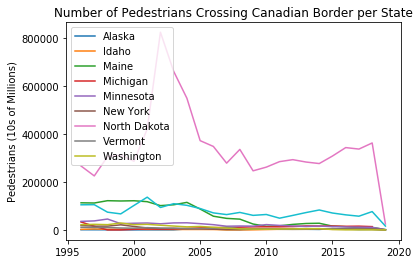

In [301]:
plt.plot(can_ped_table)
plt.legend(['Alaska', 'Idaho','Maine','Michigan','Minnesota','New York','North Dakota','Vermont','Washington'])
plt.ylabel('Pedestrians (10s of Millions)')
plt.title('Number of Pedestrians Crossing Canadian Border per State')

plt.tight_layout

In [293]:
# Also, I am more interested in all people crossing the canadian border, not just pedestrians. Iclude, Bus passengers, and Personal Vehicle Passengers
can_per_table = pvt_can_bd_state[pvt_can_bd_state.columns[[0,2,3,12,14,15,24,26,27,36,38,39,48,50,51,60,62,63,72,74,75,84,86,87,97,99,100,109,111,112]]]
can_per_table

Value                                                         \
State           Alaska                                                  Idaho   
Measure Bus Passengers Pedestrians Personal Vehicle Passengers Bus Passengers   
Year                                                                            
1996          106758.0       781.0                    259251.0        11093.0   
1997          133063.0       652.0                    256530.0        12281.0   
1998          149938.0       576.0                    303421.0        13756.0   
1999          156234.0       432.0                    260303.0        18248.0   
2000          149128.0       216.0                    264428.0        18177.0   
2001          138933.0       318.0                    251583.0        16311.0   
2002          141450.0       247.0                    256106.0        19850.0   
2003          147567.0       346.0                    241965.0        14837.0   
2004          145868.0      4066.0                    253701.0        12393.0   
2005          147633.0      3989.0                    238445.0        11976.0   
2006          156849.0      3527.0                    211605.0        12446.0   
2007          170600.0       932.0                    207882.0        10357.0   
2008          167144.0       713.0                    190112.0        10199.0   
2009          170065.0      2836.0                    205504.0         6763.0   
2010          157102.0      2745.0                    207433.0         7849.0   
2011          158466.0      2781.0                    213009.0         7750.0   
2012          168851.0      2486.0                    229786.0         5510.0   
2013          164685.0      2640.0                    229863.0         6540.0   
2014          189989.0      2066.0                    214766.0         4728.0   
2015          167107.0      5428.0                    238622.0         3660.0   
2016          182062.0      3502.0                    261082.0         4814.0   
2017          188239.0      2112.0                    260404.0         3601.0   
2018          210359.0      2566.0                    285309.0         2627.0   
2019               NaN        72.0                     15892.0          519.0   

                                                                            \
State                                                    Maine               
Measure Pedestrians Personal Vehicle Passengers Bus Passengers Pedestrians   
Year                                                                         
1996         2361.0                    533482.0        66287.0    113198.0   
1997         3963.0                    539943.0        61258.0    112392.0   
1998         2583.0                    497022.0       110401.0    122024.0   
1999         2728.0                    526134.0        60274.0    120816.0   
2000         2864.0                    510001.0        64023.0    121807.0   
2001         2393.0                    484420.0        52946.0    117928.0   
2002         2225.0                    403961.0        50034.0    101470.0   
2003         1907.0                    361905.0        38298.0    105011.0   
2004         1784.0                    352633.0        47765.0    115011.0   
2005         1796.0                    368475.0        53984.0     87153.0   
2006         1702.0                    387082.0        51883.0     57286.0   
2007          109.0                    391634.0        48866.0     48188.0   
2008          261.0                    528450.0        47707.0     45007.0   
2009          437.0                    457231.0        34674.0     24569.0   
2010         1560.0                    534176.0        38505.0     15194.0   
2011         2570.0                    518557.0        39353.0     17208.0   
2012         2443.0                    515368.0        35204.0     23032.0   
2013         2617.0                    527659.0        30006.0     26845.0   
2014         2916.0             

In [ ]:
pvt_can_bd_state[pvt_can_bd_state.columns[[0,2,3,12,14,15,24,26,27,36,38,39,48,50,51,60,62,63,72,74,75,84,86,87,97,99,100,109,111,112]]]

In [376]:
ak_per_table = pvt_can_bd_state[pvt_can_bd_state.columns[[0,2,3]]].sum(axis=1)

In [377]:
id_per_table = pvt_can_bd_state[pvt_can_bd_state.columns[[12,14,15]]].sum(axis=1)

In [378]:
can_per_table = pd.concat([ak_per_table, id_per_table], axis=1)

In [381]:
can_per_table = can_per_table.rename(columns={0: "Alaska", 1: "Idaho"})

In [383]:
main_per_table = pvt_can_bd_state[pvt_can_bd_state.columns[[24,26,27]]].sum(axis=1)

In [384]:
can_per_table = can_per_table.merge(main_per_table.to_frame(), left_index=True, right_index=True)

In [386]:
can_per_table = can_per_table.rename(columns={0: "Main"})

In [388]:
mich_per_table = pvt_can_bd_state[pvt_can_bd_state.columns[[36,38,39]]].sum(axis=1)

In [389]:
can_per_table = can_per_table.merge(mich_per_table.to_frame(), left_index=True, right_index=True)

In [390]:
can_per_table = can_per_table.rename(columns={0: "Michigan"})

In [391]:
minn_per_table = pvt_can_bd_state[pvt_can_bd_state.columns[[48,50,51]]].sum(axis=1)

In [392]:
can_per_table = can_per_table.merge(minn_per_table.to_frame(), left_index=True, right_index=True)

In [393]:
can_per_table = can_per_table.rename(columns={0: "Minnesota"})

In [394]:
mont_per_table = pvt_can_bd_state[pvt_can_bd_state.columns[[60,62,63]]].sum(axis=1)

In [395]:
can_per_table = can_per_table.merge(mont_per_table.to_frame(), left_index=True, right_index=True)

In [396]:
can_per_table = can_per_table.rename(columns={0: "Montana"})

In [397]:
ny_per_table = pvt_can_bd_state[pvt_can_bd_state.columns[[72,74,75]]].sum(axis=1)

In [398]:
can_per_table = can_per_table.merge(ny_per_table.to_frame(), left_index=True, right_index=True)

In [399]:
can_per_table = can_per_table.rename(columns={0: "New York"})

In [400]:
nd_per_table = pvt_can_bd_state[pvt_can_bd_state.columns[[84,86,87]]].sum(axis=1)

In [401]:
can_per_table = can_per_table.merge(nd_per_table.to_frame(), left_index=True, right_index=True)

In [402]:
can_per_table = can_per_table.rename(columns={0: "North Dakota"})

In [404]:
vt_per_table = pvt_can_bd_state[pvt_can_bd_state.columns[[97,99,100]]].sum(axis=1)

In [405]:
can_per_table = can_per_table.merge(vt_per_table.to_frame(), left_index=True, right_index=True)

In [406]:
can_per_table = can_per_table.rename(columns={0: "Vermont"})

In [407]:
wash_per_table = pvt_can_bd_state[pvt_can_bd_state.columns[[109,111,112]]].sum(axis=1)

In [408]:
can_per_table = can_per_table.merge(wash_per_table.to_frame(), left_index=True, right_index=True)

In [409]:
can_per_table = can_per_table.rename(columns={0: "Washington"})

In [410]:
can_per_table

,Alaska,Idaho,Main,Michigan,Minnesota,Montana,New York,North Dakota,Vermont,Washington
Year,,,,,,,,,,
1996,366790.0,546936.0,9714618.0,35693921.0,3159473.0,1702490.0,28243841.0,1988244.0,3742527.0,20389962.0
1997,390245.0,556187.0,9389759.0,28375616.0,2919389.0,1722269.0,29999270.0,1826424.0,3475382.0,18666576.0
1998,453935.0,513361.0,8781048.0,30400512.0,3021078.0,1676338.0,28336941.0,1706378.0,3238417.0,14723320.0
1999,416969.0,547110.0,8357471.0,30320578.0,3057354.0,1881011.0,28035848.0,1754139.0,3510807.0,16443210.0
2000,413772.0,531042.0,8154308.0,33630327.0,3166356.0,1507509.0,28064110.0,1794440.0,3337447.0,14908096.0
2001,390834.0,503124.0,6998901.0,23249050.0,2853658.0,1351153.0,26870948.0,1616888.0,3144224.0,13201346.0
2002,397803.0,426036.0,6205129.0,19548787.0,2659168.0,1343413.0,28486572.0,1676200.0,3085865.0,10454987.0
2003,389878.0,378649.0,6228256.0,17701600.0,2769584.0,1377389.0,23558511.0,1615353.0,2862729.0,9975489.0
2004,403635.0,366810.0,6882661.0,17387011.0,2971102.0,1397869.0,23460409.0,1649039.0,2789395.0,10684579.0


Text(0.5, 0, 'Year')

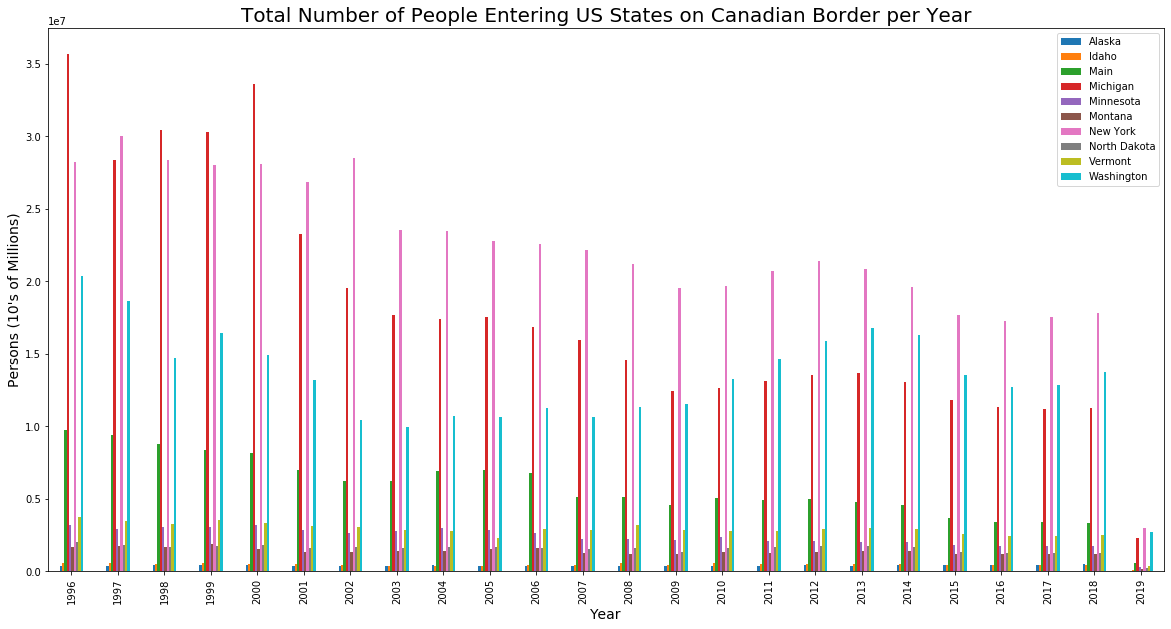

In [435]:
can_per_table.plot(kind='bar')
plt.rcParams["figure.figsize"] = (20,10)
plt.ylabel('Persons (10\'s of Millions)', fontsize=14)
plt.title('Total Number of People Entering US States on Canadian Border per Year', fontsize=20)
plt.xlabel('Year', fontsize=14)

Lets look at this as a line graph

Text(0.5, 0, 'Year')

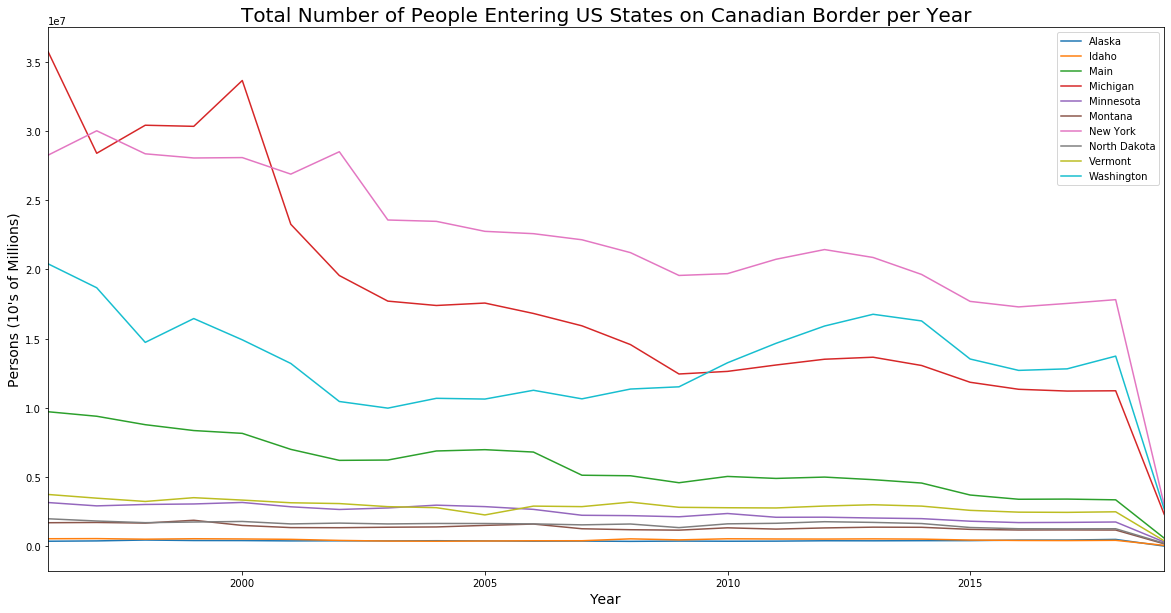

In [436]:
can_per_table.plot(kind='line')
plt.rcParams["figure.figsize"] = (20,10)
plt.ylabel('Persons (10\'s of Millions)', fontsize=14)
plt.title('Total Number of People Entering US States on Canadian Border per Year', fontsize=20)
plt.xlabel('Year', fontsize=14)

# Now lets look at commercial imports

In [437]:
pvt_can_bd_state.head()

Value                                                   \
State           Alaska                                                    
Measure Bus Passengers    Buses Pedestrians Personal Vehicle Passengers   
Year                                                                      
1996          106758.0   7867.0       781.0                    259251.0   
1997          133063.0   9115.0       652.0                    256530.0   
1998          149938.0   9666.0       576.0                    303421.0   
1999          156234.0  10134.0       432.0                    260303.0   
2000          149128.0   9603.0       216.0                    264428.0   

                                                                      \
State                                                                  
Measure Personal Vehicles Rail Containers Empty Rail Containers Full   
Year                                                                   
1996             116554.0                   0.0                  0.0   
1997             114562.0                   0.0                  0.0   
1998             124396.0                   0.0                  0.0   
1999             119662.0                   0.0                  0.0   
2000             117925.0                   0.0                  0.0   

                                                        ...              \
State                                                   ...  Washington   
Measure Train Passengers Trains Truck Containers Empty  ... Pedestrians   
Year                                                    ...               
1996             23068.0  234.0                    0.0  ...    104891.0   
1997             22323.0  259.0                  415.0  ...    105374.0   
1998             30580.0  277.0                 3323.0  ...     74095.0   
1999             28166.0  266.0                 2847.0  ...     66927.0   
2000             35253.0  326.0                 2466.0  ...    102167.0   

                                                                             \
State                                                                         
Measure Personal Vehicle Passengers Personal Vehicles Rail Containers Empty   
Year                                                                          
1996                     19708130.0         8305380.0               15234.0   
1997                     17948455.0         7694358.0               17910.0   
1998                     14099556.0         6035943.0               22086.0   
1999                     15803125.0         6001827.0               15603.0   
2000                     14239259.0         6052070.0               16602.0   

                                                                              \
State                                                                          
Measure Rail Containers Full Train Passengers  Trains Truck Containers Empty   
Year                                                                           
1996                 43415.0          46560.0  3245.0                62179.0   
1997                 52446.0          67073.0  3128.0               110233.0   
1998                 60742.0          51904.0  3190.0               163535.0   
1999                 65726.0          50324.0  2951.0               174427.0   
2000                 48770.0          52369.0  3032.0               134161.0   

                                         
State                                    
Measure Truck Containers Full    Trucks  
Year                                     
1996                 235340.0  597018.0  
1997                 367258.0  654965.0  
1998                 552224.0  748481.0  
1999                 517123.0  736352.0  
2000                 363244.0  778338.0  

[5 rows x 121 columns]

In [449]:
#Include all measures related to commercial movement. Include Rail Containers Empty and Full as well as Truck Containers Empty and Full
can_com_table = pvt_can_bd_state[pvt_can_bd_state.columns[[5,6,9,10,17,18,21,22,29,30,33,34,41,42,45,46,53,54,57,58,65,66,69,70,77,78,81,82,90,91,94,95,102,103,106,107,114,115,118,119]]]
can_com_table

Value                                              \
State                  Alaska                                               
Measure Rail Containers Empty Rail Containers Full Truck Containers Empty   
Year                                                                        
1996                      0.0                  0.0                    0.0   
1997                      0.0                  0.0                  415.0   
1998                      0.0                  0.0                 3323.0   
1999                      0.0                  0.0                 2847.0   
2000                      0.0                  0.0                 2466.0   
2001                      0.0                  0.0                 2287.0   
2002                      0.0                  0.0                 1537.0   
2003                      0.0                  0.0                  929.0   
2004                      0.0                  0.0                  817.0   
2005                      0.0                  0.0                  759.0   
2006                      0.0                  0.0                  812.0   
2007                      0.0                  0.0                  942.0   
2008                      0.0                  0.0                  755.0   
2009                      0.0                  0.0                 1044.0   
2010                      0.0                  0.0                 4579.0   
2011                      0.0                  0.0                 4356.0   
2012                      0.0                  0.0                 3856.0   
2013                      0.0                  0.0                 3770.0   
2014                      0.0                  0.0                 3882.0   
2015                      0.0                  0.0                 3821.0   
2016                      0.0                  0.0                 4326.0   
2017                      NaN                  NaN                 9175.0   
2018                      NaN                  NaN                 8464.0   
2019                      NaN                  NaN                 1708.0   

                                                                          \
State                                         Idaho                        
Measure Truck Containers Full Rail Containers Empty Rail Containers Full   
Year                                                                       
1996                      0.0                2095.0              24912.0   
1997                    990.0                2295.0              27371.0   
1998                   7816.0                3956.0              33623.0   
1999                   6573.0                2464.0              39872.0   
2000                   7244.0                2977.0              47263.0   
2001                   7645.0                4730.0              54593.0   
2002                   8472.0                4669.0              60502.0   
2003                   8676.0                6452.0              68047.0   
2004                   8954.0                6374.0              71759.0   
2005                   7586.0                6527.0              82294.0   
2006                   7258.0                6902.0              88632.0   
2007                   7591.0                6935.0              87387.0   
2008                   7061.0                7750.0              92915.0   
2009                   7059.0                6338.0              68792.0   
2010                  10141.0                8153.0              89365.0   
2011                  10469.0                9266.0              89989.0   
2012                   9920.0                8799.0              88508.0   
2013                   9449.0                7590.0              99890.0   
2014                   8694.0                8443.0             119017.0   
2015                   8851.0                6530.0             115711.0   
2016                   9584.0              

Seems like there are so null values. Need to change these to zeros

In [450]:
can_com_table = can_com_table.dropna(0)

In [467]:
# can_com_table

In [528]:
ak_com_table = pvt_can_bd_state[pvt_can_bd_state.columns[[5,6,9,10]]].sum(axis=1)

In [529]:
id_com_table = pvt_can_bd_state[pvt_can_bd_state.columns[[17,18,21,22]]].sum(axis=1)

In [530]:
can_com_table = pd.concat([ak_com_table, id_com_table], axis=1)

In [531]:
can_com_table = can_com_table.rename(columns={0: "Alaska", 1: "Idaho"})

In [532]:
main_com_table = pvt_can_bd_state[pvt_can_bd_state.columns[[29,30,33,34]]].sum(axis=1)

In [533]:
can_com_table = can_com_table.merge(main_com_table.to_frame(), left_index=True, right_index=True)

In [534]:
can_com_table = can_com_table.rename(columns={0: "Main"})

In [535]:
mich_com_table = pvt_can_bd_state[pvt_can_bd_state.columns[[41,42,45,46]]].sum(axis=1)

In [536]:
can_com_table = can_com_table.merge(mich_com_table.to_frame(), left_index=True, right_index=True)

In [537]:
can_com_table = can_com_table.rename(columns={0: "Michigan"})

In [538]:
minn_com_table = pvt_can_bd_state[pvt_can_bd_state.columns[[53,54,57,58]]].sum(axis=1)

In [539]:
can_com_table = can_com_table.merge(minn_com_table.to_frame(), left_index=True, right_index=True)

In [540]:
can_com_table = can_com_table.rename(columns={0: "Minnesota"})

In [541]:
mont_com_table = pvt_can_bd_state[pvt_can_bd_state.columns[[65,66,69,70]]].sum(axis=1)

In [542]:
can_com_table = can_com_table.merge(mont_com_table.to_frame(), left_index=True, right_index=True)

In [543]:
can_com_table = can_com_table.rename(columns={0: "Montana"})

In [544]:
ny_com_table = pvt_can_bd_state[pvt_can_bd_state.columns[[77,78,81,82]]].sum(axis=1)

In [545]:
can_com_table = can_com_table.merge(ny_com_table.to_frame(), left_index=True, right_index=True)

In [546]:
can_com_table = can_com_table.rename(columns={0: "New York"})

In [547]:
nd_com_table = pvt_can_bd_state[pvt_can_bd_state.columns[[90,91,94,95]]].sum(axis=1)

In [548]:
can_com_table = can_com_table.merge(nd_com_table.to_frame(), left_index=True, right_index=True)

In [549]:
can_com_table = can_com_table.rename(columns={0: "North Dakota"})

In [551]:
vt_com_table = pvt_can_bd_state[pvt_can_bd_state.columns[[102,103,106,107]]].sum(axis=1)

In [552]:
can_com_table = can_com_table.merge(vt_com_table.to_frame(), left_index=True, right_index=True)

In [553]:
can_com_table = can_com_table.rename(columns={0: "Vermont"})

In [555]:
wash_com_table = pvt_can_bd_state[pvt_can_bd_state.columns[[114,115,118,119]]].sum(axis=1)

In [556]:
can_com_table = can_com_table.merge(wash_com_table.to_frame(), left_index=True, right_index=True)

In [557]:
can_com_table = can_com_table.rename(columns={0: "Washington"})

In [558]:
can_com_table

,Alaska,Idaho,Main,Michigan,Minnesota,Montana,New York,North Dakota,Vermont,Washington
Year,,,,,,,,,,
1996,0.0,72346.0,234921.0,1004351.0,69413.0,162485.0,1764.0,348186.0,124531.0,356168.0
1997,1405.0,72536.0,298760.0,1414951.0,107078.0,181891.0,189378.0,306250.0,153422.0,547847.0
1998,11139.0,82262.0,437909.0,2842219.0,323566.0,192534.0,1043407.0,469906.0,197991.0,798587.0
1999,9420.0,91195.0,461952.0,3121008.0,370233.0,207441.0,1968968.0,700604.0,223092.0,772879.0
2000,9710.0,103342.0,454425.0,3151163.0,381947.0,224000.0,2167331.0,766706.0,277178.0,562777.0
2001,9932.0,115900.0,409139.0,3399924.0,400339.0,225088.0,2124513.0,806497.0,325167.0,827376.0
2002,10009.0,123476.0,505624.0,3409849.0,437113.0,215947.0,2246889.0,800069.0,346091.0,800877.0
2003,9605.0,124466.0,517525.0,3347019.0,434921.0,183899.0,2253418.0,769160.0,337033.0,718703.0
2004,9771.0,126399.0,554275.0,3413224.0,436620.0,205163.0,2254147.0,817984.0,338302.0,811144.0


Text(0.5, 0, 'Year')

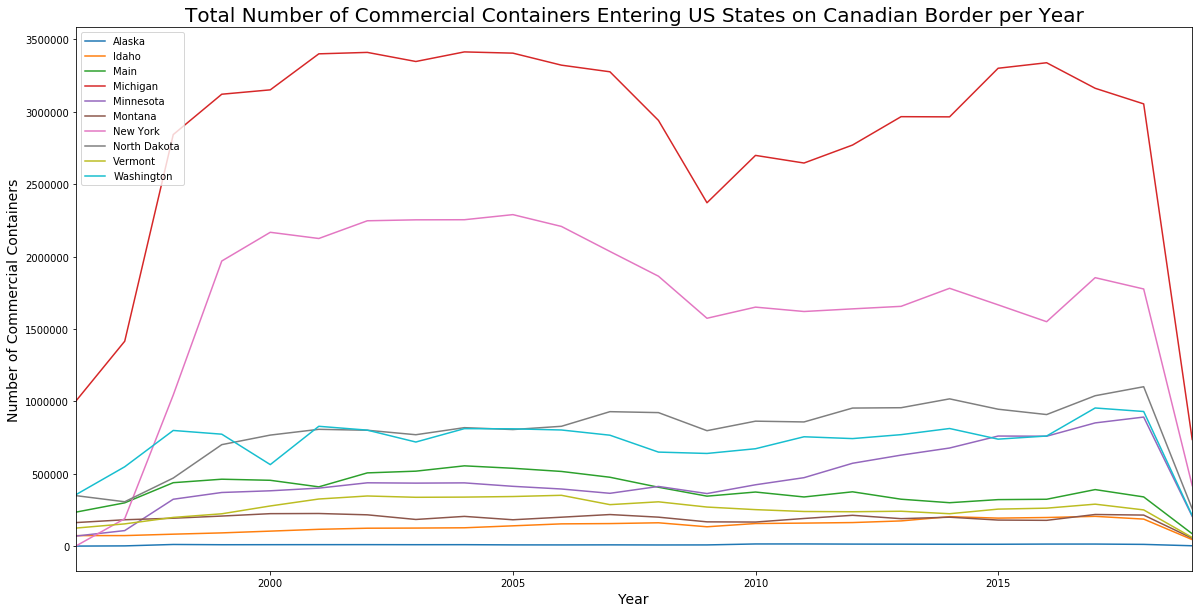

In [561]:
can_com_table.plot(kind='line')
plt.rcParams["figure.figsize"] = (20,10)
plt.ylabel('Number of Commercial Containers', fontsize=14)
plt.title('Total Number of Commercial Containers Entering US States on Canadian Border per Year', fontsize=20)
plt.xlabel('Year', fontsize=14)